In [39]:
###|
import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
### increase font size to 16
plt.rcParams.update({'font.size': 16})

# sns.set(rc={'text.usetex':False, 'font.family':'sans-serif', 'font.sans-serif':'Helvetica'}, font='Helvetica')
# plt.rc('text', usetex=False)
# plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

# mpl.rc('font',**{'family':'sans-serif','sans-serif':'Helvetica'})
from matplotlib import rc


In [40]:
type_data = "variance"
with open('./dl_final_maxmargin_diagonal' + type_data + '.pkl', 'rb') as f:
    maxmargin_data = pickle.load(f)
with open('./dl_final_sparse_diagonal' + type_data + '.pkl', 'rb') as f:
    sparse_data = pickle.load(f)

In [41]:
maxmargin_data['niac_margin']

0.0010000019230882971

In [42]:
max_margin_costs = maxmargin_data['lagrange_cost_multipliers']/1000
sparse_data_costs = sparse_data['lagrange_cost_multipliers']*100


In [43]:
max_margin_utility = maxmargin_data['utils']
sparse_utility = sparse_data['utils']

In [44]:
### Get diagonal elements of max_margin_utility
max_margin_utility_diag = np.zeros((len(max_margin_utility)-1,max_margin_utility[0].shape[0]))
sparse_utility_diag = np.zeros((len(sparse_utility)-1,sparse_utility[0].shape[0]))
n_decisions = len(max_margin_utility)-1
for n in range(n_decisions):
    for i in range(max_margin_utility[0].shape[0]):
        max_margin_utility_diag[n,i] = max_margin_utility[n][i,i]
        sparse_utility_diag[n,i] = sparse_utility[n][i,i]

In [45]:
## display  only the first 10 decimels
max_margin_utility_diag_df = (pd.DataFrame(max_margin_utility_diag.T)/1000).round(2)
max_margin_utility_diag_df.to_clipboard()

In [46]:
if type_data == "variance":
    labels = [0.001,0.004,0.01,0.04,0.1]
    y_axis_label = "Variance of the added noise $\sigma^2$" 
else:
    labels = [2,4,6,8,10]
    y_axis_label = "Number of epochs"


In [47]:
sparse_utility_diag.max()

0.0016814163555290923

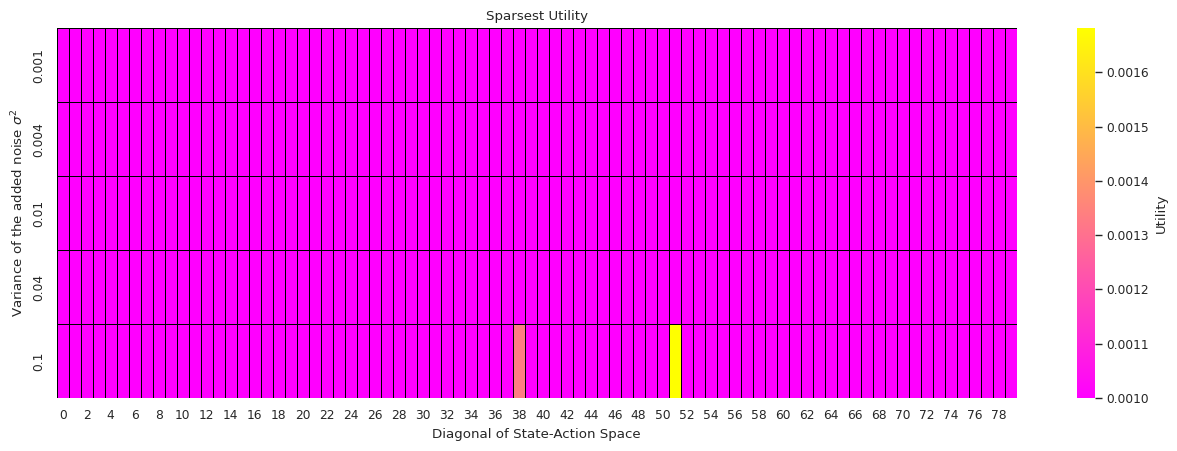

In [48]:
### heat map of max_margin_utility_diag
fig, ax = plt.subplots()
### spacing between the two heatmaps
### text inside the heatmap corresponds to the utility
# labels = [0.001,0.004,0.01,0.04,0.1]
labels_N = np.arange(len(labels))
plt.subplots_adjust(right=2)
sns.heatmap(sparse_utility_diag, ax=ax, cmap='spring', cbar_kws={'label': 'Utility'},linewidths=0.5, linecolor='black',fmt='.2f')
ax.set_title('Sparsest Utility')
ax.set_ylabel(y_axis_label)
ax.set_yticks(labels_N+0.5,labels)
ax.set_xlabel('Diagonal of State-Action Space')

plt.savefig(f"./sparsest_utility_{type_data}.png",dpi=300,bbox_inches='tight')

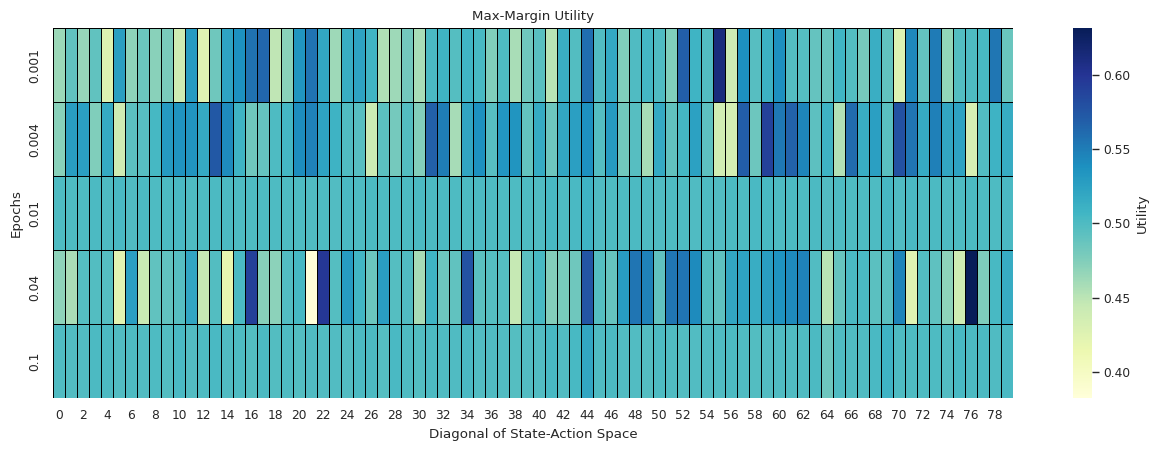

In [49]:
### heat map of max_margin_utility_diag
fig, ax = plt.subplots()
### spacing between the two heatmaps
### text inside the heatmap corresponds to the utility

labels_N = np.arange(len(labels))
plt.subplots_adjust(right=2)
### colormap with contrast 
sns.heatmap(max_margin_utility_diag/1000, ax=ax, cmap='YlGnBu', cbar_kws={'label': 'Utility'},linewidths=0.5, linecolor='black',fmt='.2f')
ax.set_title('Max-Margin Utility')
ax.set_ylabel(y_axis_label)
ax.set_ylabel('Epochs')
ax.set_yticks(labels_N+0.5,labels)
ax.set_xlabel('Diagonal of State-Action Space')

plt.savefig(f"./max_margin_utility_{type_data}.png",dpi=300,bbox_inches='tight')

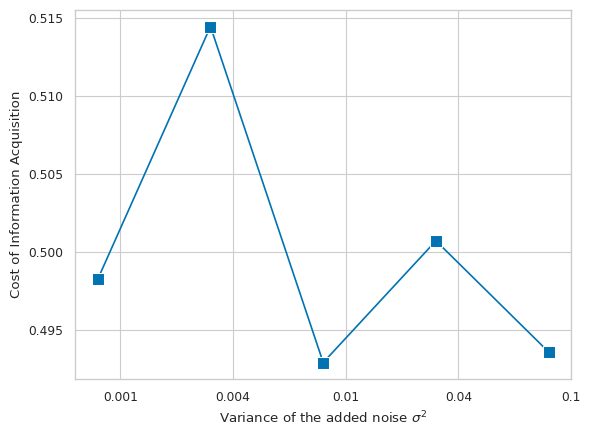

In [50]:
### use sns to plot bar chart
fig, ax = plt.subplots()
sns.set_palette("colorblind")
sns.set_context("paper")
sns.set_style("whitegrid")

# plot the data
labels = [0.001,0.004,0.01,0.04,0.1]
labels_N = np.arange(len(labels))
sns.lineplot(x=labels_N,y=max_margin_costs,marker="s",ax=ax,markersize=8)
# ax.bar(labels_N+0.4,sparse_data_costs, label='Sparsest',width=0.4)

# set the x-axis labels
ax.set_xticks(labels_N + 0.4 / 2, labels)
ax.set_xlabel(y_axis_label)
ax.set_ylabel('Cost of Information Acquisition')



# save the figure as eps
plt.savefig(f"./cost_of_information_{type_data}.png",dpi=300,bbox_inches='tight')
